<a href="https://colab.research.google.com/github/madarasw/ML_Basics/blob/main/Cost_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import os
import sys
import matplotlib.pyplot as plt

sys.path.append("drive/MyDrive/Colab Notebooks")
plt.style.use('drive/MyDrive/Colab Notebooks/deeplearning.mplstyle')
os.listdir("drive/MyDrive/Colab Notebooks")

['Test.ipynb',
 'My_Data.csv',
 'Linear_Regression.ipynb',
 'Test2.ipynb',
 'FinRobot.ipynb',
 'DataInterpreter.ipynb',
 'Data Interpreter 2.ipynb',
 'Copy of turicreate-activity-classification.ipynb',
 'Untitled0.ipynb',
 'Untitled1.ipynb',
 'Vectorization.ipynb',
 'Multiple Variable Linear Regression.ipynb',
 'deeplearning.mplstyle',
 '__pycache__',
 'lab_utils_common.py',
 'lab_utils_multi.py',
 'Feature scaling and learning rate.ipynb',
 'Model_Representation.ipynb',
 'Cost_function.ipynb',
 'lab_utils_uni.py']

Goal:
Implement and explore the cost function for linear regression with one variable.
Compute Cost.

## Problem Statement

You would like a model which can predict housing prices given the size of the house.  
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [60]:
import numpy as np
%matplotlib inline
from lab_utils_common import dlc
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl

In [61]:
# training data

x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.

In [62]:
def compute_cost(x, y, w, b):
  '''
  Compute the cost for linear regression.
  Inputs: x_train, y_train, w, b
  Output: Cost for a given w and b
  '''

  m = x.size[0]
  cost = 0
  for i in range(m):
    f_wb = w*x[i] + b
    cost += (f_wb - y[i])**2
  cost = cost/(2*m)
  return cost

Goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized. In this simple two point example, you can achieve this!

In the previous lab, you determined that $b=100$ provided an optimal solution so let's set $b$ to 100 and focus on $w$.

<br/>
Below, use the slider control to select the value of $w$ that minimizes cost. It can take a few seconds for the plot to update.

In [55]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

In [63]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

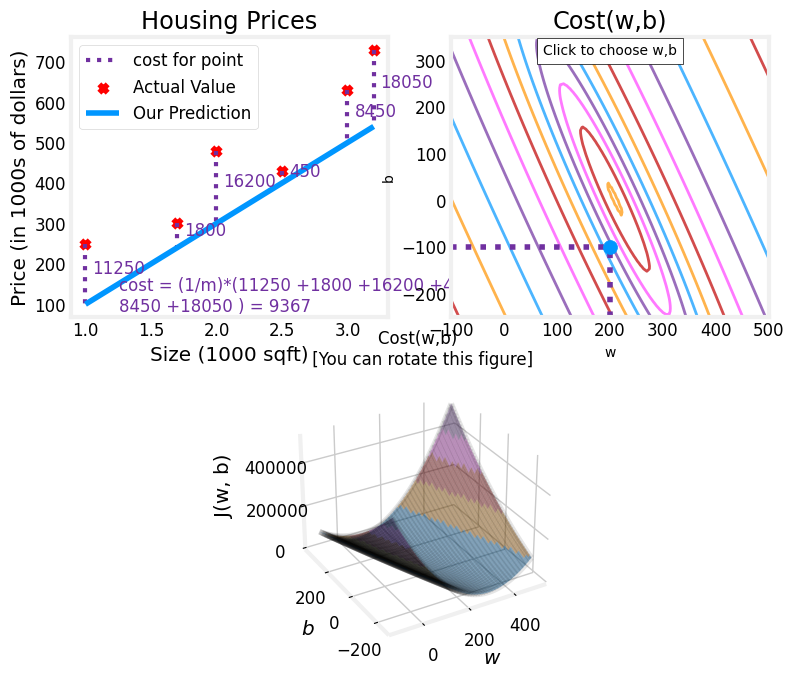

In [64]:
plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

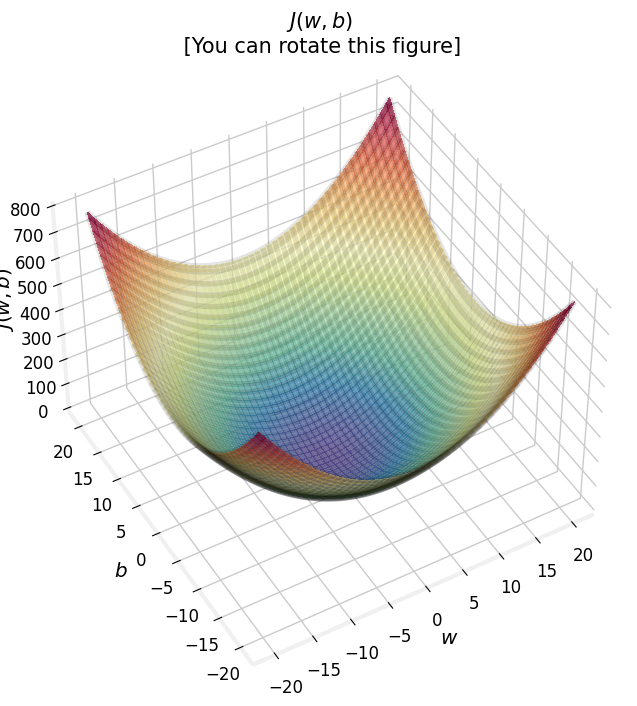

In [65]:
soup_bowl()

Yay!